In [150]:
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.axes as ax
def log_loader(logpath,max_size=123):
    with open(logpath) as f:
        rawtxt = f.read().replace("\x1b[94m","").replace("\x1b[91m","").replace("\x1b[0m","").replace("\x1b[92m","").split("\n")
    df = pd.DataFrame(columns=['Epoch','val_acc','test_acc'])
    df_loss = pd.DataFrame(columns=['curr_loss','sec_per_sent'])
    j=0
    for i in range(len(rawtxt)):
        if "Epoch" in rawtxt[i]:
            epoch =  int(rawtxt[i][-2:])
            val_test_list = rawtxt[i+2].split(" ")
            valac = float(val_test_list[5])
            testac = float(val_test_list[10])
            df = df.append({
                'Epoch':epoch,
                'val_acc':valac,
                'test_acc':testac
            }, ignore_index=True)
        if "curr_loss" in rawtxt[i]:
            loss_list = rawtxt[i].split(" ")
            curr_loss = float(loss_list[7][:-1])
            sec_per_sent = float(loss_list[-1])
            df_loss = df_loss.append({
                'curr_loss':curr_loss,
                'sec_per_sent':sec_per_sent
            }, ignore_index=True)
            if j==max_size:
                break
            else:
                j+=1
                
    return df, df_loss

In [151]:
sample_size = 128000

In [152]:
def datapoints(df_loss,smooth=True,ave_num=20,ave=False):
    time = np.cumsum(np.array(df_loss['sec_per_sent']*sample_size))
    loss = np.array(df_loss['curr_loss'])
    i = 0
    if ave:
        ave_losses = []
        while i<len(time):
            ave_loss = np.sum(loss[i:i+4])/4
            i+=4
            ave_losses.append(ave_loss)
        epoch = range(len(ave_losses))
        
        return epoch, ave_losses
            
    if smooth:
        for _ in range(ave_num):     
            loss = (loss[:-1]+loss[1:])/2
        return time[ave_num:], loss
    else:
        return time, loss

In [228]:
def epoch_vs_acc(df_acc,smooth=False,ave_num=2,ave=False):
    epoch = range(31)
    acc = np.array(df_acc.loc[:30])[:,1]
#     i = 0
#     if ave:
#         ave_acc = []
#         while i<len(epoch):
#             ave_acc = np.sum(acc[i:i+4])/4
#             i+=4
#             ave_acc.append(ave_acc)
#         epoch = range(len(ave_losses))
        
#         return epoch, ave_acc
            
#     if smooth:
#         for _ in range(ave_num):     
#             acc = (acc[:-1]+acc[1:])/2
#         return epoch[ave_num:], acc
#     else:
    return epoch, acc

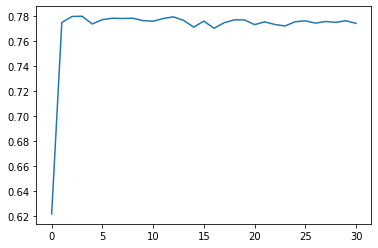

In [229]:
epoch,acc = epoch_vs_acc(twod_eucl_rnn,smooth=False)
plt.plot(epoch, acc,label='2D euclidean')

## calculation

In [205]:
twod_eucl_rnn, twod_eucl_rnn_loss = log_loader('2D_eucl_rnn.txt')

In [206]:
len(np.array(twod_eucl_rnn_loss['curr_loss']))

124

In [207]:
time_two = np.cumsum(twod_eucl_rnn_loss['sec_per_sent']*sample_size)
time_two

0        64.0
1       128.0
2       192.0
3       256.0
4       320.0
        ...  
119    6745.6
120    6809.6
121    6873.6
122    6937.6
123    7001.6
Name: sec_per_sent, Length: 124, dtype: float64

In [208]:
twod_hyp_rnn, twod_hyp_rnn_loss = log_loader('2D_hyp_rnn.txt')

In [209]:
time_two= np.cumsum(twod_hyp_rnn_loss['sec_per_sent']*sample_size)
time_two

0        307.2
1        614.4
2        921.6
3       1241.6
4       1548.8
        ...   
119    40576.0
120    41036.8
121    41510.4
122    41971.2
123    42432.0
Name: sec_per_sent, Length: 124, dtype: float64

In [210]:
29286./60/60

8.135

In [211]:
five_eucl_rnn, five_eucl_rnn_loss = log_loader('5D_eucl_rnn.txt')

In [212]:
time_fived = np.cumsum(five_eucl_rnn_loss['sec_per_sent']*sample_size)
time_fived

0        51.2
1       102.4
2       153.6
3       204.8
4       256.0
        ...  
119    6144.0
120    6195.2
121    6246.4
122    6297.6
123    6348.8
Name: sec_per_sent, Length: 124, dtype: float64

In [213]:
five_hyp_rnn, five_hyp_rnn_loss = log_loader('5D_hyp_rnn.txt')

In [214]:
time_fived = np.cumsum(five_hyp_rnn_loss['sec_per_sent']*sample_size)
time_fived

0        358.4
1        729.6
2       1100.8
3       1484.8
4       1856.0
        ...   
119    42329.6
120    42662.4
121    42995.2
122    43340.8
123    43673.6
Name: sec_per_sent, Length: 124, dtype: float64

In [215]:
ten_eucl_rnn, ten_eucl_rnn_loss = log_loader('10D_eucl_rnn.txt')

In [216]:
time_ten = np.cumsum(ten_eucl_rnn_loss['sec_per_sent']*sample_size)
time_ten

0        76.8
1       153.6
2       230.4
3       307.2
4       384.0
        ...  
119    9216.0
120    9292.8
121    9369.6
122    9446.4
123    9523.2
Name: sec_per_sent, Length: 124, dtype: float64

In [217]:
ten_hyp_rnn, ten_hyp_rnn_loss = log_loader('10D_hyp_rnn.txt')

In [218]:
time_ten = np.cumsum(ten_hyp_rnn_loss['sec_per_sent']*sample_size)
time_ten

0        307.2
1        614.4
2        921.6
3       1228.8
4       1536.0
        ...   
119    37324.8
120    37644.8
121    37952.0
122    38259.2
123    38566.4
Name: sec_per_sent, Length: 124, dtype: float64

## Result (Accuracies)

In [219]:
twod_eucl_rnn.loc[30]

Epoch       30.0000
val_acc      0.7742
test_acc     0.7791
Name: 30, dtype: float64

In [220]:
twod_hyp_rnn.loc[30]

Epoch       4.0000
val_acc     0.7914
test_acc    0.7919
Name: 30, dtype: float64

In [221]:
five_eucl_rnn.loc[30]

Epoch       30.0000
val_acc      0.7891
test_acc     0.7852
Name: 30, dtype: float64

In [222]:
five_hyp_rnn.loc[30]

Epoch       7.0000
val_acc     0.8141
test_acc    0.8139
Name: 30, dtype: float64

In [223]:
ten_eucl_rnn.loc[30]

Epoch       30.0000
val_acc      0.7970
test_acc     0.7877
Name: 30, dtype: float64

In [224]:
ten_hyp_rnn.loc[30]

Epoch       4.0000
val_acc     0.8254
test_acc    0.8227
Name: 30, dtype: float64

(0.4, 0.9)

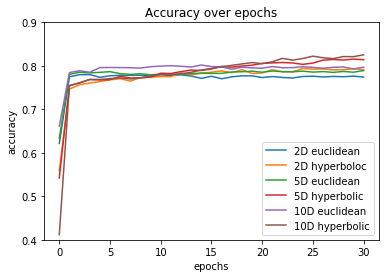

In [249]:
fig, ax = plt.subplots()

epoch,acc = epoch_vs_acc(twod_eucl_rnn)
plt.plot(epoch, acc,label='2D euclidean')
    
epoch,acc = epoch_vs_acc(twod_hyp_rnn)
plt.plot(epoch, acc,label='2D hyperboloc')

epoch,acc = epoch_vs_acc(five_eucl_rnn)
plt.plot(epoch, acc,label='5D euclidean')

epoch,acc = epoch_vs_acc(five_hyp_rnn)
plt.plot(epoch, acc,label='5D hyperbolic')

epoch, acc = epoch_vs_acc(ten_eucl_rnn)
plt.plot(epoch, acc,label='10D euclidean')

epoch,acc = epoch_vs_acc(ten_hyp_rnn)
plt.plot(epoch, acc,label='10D hyperbolic')

plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('Accuracy over epochs')
plt.savefig('plot0_1.png')
plt.ylim(0.4,0.9)

(0.6, 0.9)

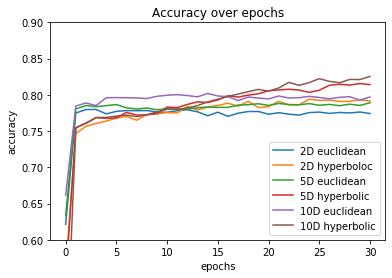

In [250]:
fig, ax = plt.subplots()

epoch,acc = epoch_vs_acc(twod_eucl_rnn)
plt.plot(epoch, acc,label='2D euclidean')
    
epoch,acc = epoch_vs_acc(twod_hyp_rnn)
plt.plot(epoch, acc,label='2D hyperboloc')

epoch,acc = epoch_vs_acc(five_eucl_rnn)
plt.plot(epoch, acc,label='5D euclidean')

epoch,acc = epoch_vs_acc(five_hyp_rnn)
plt.plot(epoch, acc,label='5D hyperbolic')

epoch, acc = epoch_vs_acc(ten_eucl_rnn)
plt.plot(epoch, acc,label='10D euclidean')

epoch,acc = epoch_vs_acc(ten_hyp_rnn)
plt.plot(epoch, acc,label='10D hyperbolic')

plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('Accuracy over epochs')
plt.savefig('plot0_2.png')
plt.ylim(0.6,0.9)

## Result (Losses)

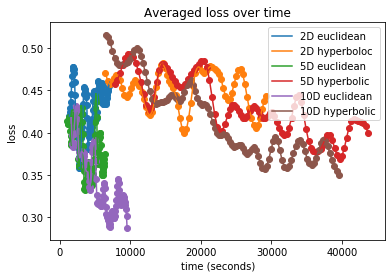

In [100]:
time,loss = datapoints(twod_eucl_rnn_loss)
plt.scatter(time, loss)
plt.plot(time, loss,label='2D euclidean')
time,loss = datapoints(twod_hyp_rnn_loss)
plt.scatter(time, loss)
plt.plot(time, loss,label='2D hyperboloc')
time,loss = datapoints(five_eucl_rnn_loss)
plt.scatter(time, loss)
plt.plot(time, loss,label='5D euclidean')
time,loss = datapoints(five_hyp_rnn_loss)
plt.scatter(time, loss)
plt.plot(time, loss,label='5D hyperbolic')
time, loss = datapoints(ten_eucl_rnn_loss)
plt.scatter(time, loss)
plt.plot(time, loss,label='10D euclidean')
time,loss = datapoints(ten_hyp_rnn_loss)
plt.scatter(time, loss)
plt.plot(time, loss,label='10D hyperbolic')
plt.legend()
plt.ylabel('loss')
plt.xlabel('time (seconds)')
plt.title('Averaged loss over time')
plt.savefig('plot1.png')

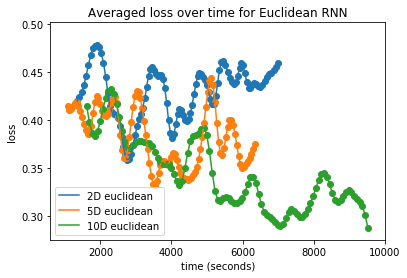

In [101]:
time,loss = datapoints(twod_eucl_rnn_loss)
plt.scatter(time, loss)
plt.plot(time, loss,label='2D euclidean')

time,loss = datapoints(five_eucl_rnn_loss)
plt.scatter(time, loss)
plt.plot(time, loss,label='5D euclidean')

time, loss = datapoints(ten_eucl_rnn_loss)
plt.scatter(time, loss)
plt.plot(time, loss,label='10D euclidean')

plt.legend()
plt.ylabel('loss')
plt.xlabel('time (seconds)')
plt.title('Averaged loss over time for Euclidean RNN')
plt.savefig('plot2.png')

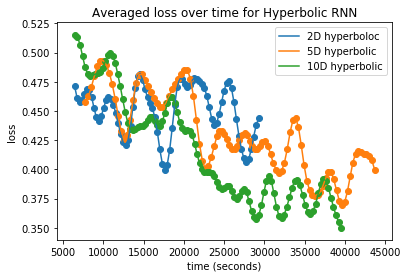

In [102]:

time,loss = datapoints(twod_hyp_rnn_loss)
plt.scatter(time, loss)
plt.plot(time, loss,label='2D hyperboloc')

time,loss = datapoints(five_hyp_rnn_loss)
plt.scatter(time, loss)
plt.plot(time, loss,label='5D hyperbolic')

time,loss = datapoints(ten_hyp_rnn_loss)
plt.scatter(time, loss)
plt.plot(time, loss,label='10D hyperbolic')
plt.legend()
plt.ylabel('loss')
plt.xlabel('time (seconds)')
plt.title('Averaged loss over time for Hyperbolic RNN')
plt.savefig('plot3.png')

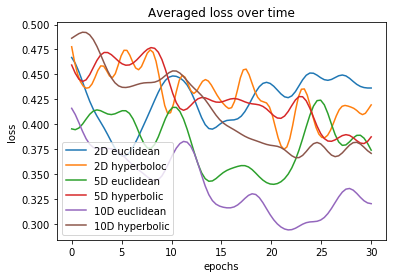

In [251]:
fig, ax = plt.subplots()
time,loss = datapoints(twod_eucl_rnn_loss,ave_num=40)
epoch = np.linspace(0,30,num=len(loss))
# plt.scatter(epoch, loss)
plt.plot(epoch, loss,label='2D euclidean')
time,loss = datapoints(twod_hyp_rnn_loss)
epoch = np.linspace(0,30,num=len(loss))
# # plt.scatter(epoch, loss)
plt.plot(epoch, loss,label='2D hyperboloc')
time,loss = datapoints(five_eucl_rnn_loss,ave_num=40)
epoch = np.linspace(0,30,num=len(loss))
# plt.scatter(epoch, loss)
plt.plot(epoch, loss,label='5D euclidean')
time,loss = datapoints(five_hyp_rnn_loss,ave_num=40)
epoch = np.linspace(0,30,num=len(loss))
# plt.scatter(epoch, loss)
plt.plot(epoch, loss,label='5D hyperbolic')
time, loss = datapoints(ten_eucl_rnn_loss,ave_num=40)
epoch = np.linspace(0,30,num=len(loss))
# plt.scatter(epoch, loss)
plt.plot(epoch, loss,label='10D euclidean')
time,loss = datapoints(ten_hyp_rnn_loss,ave_num=40)
epoch = np.linspace(0,30,num=len(loss))
# plt.scatter(epoch, loss)
plt.plot(epoch, loss,label='10D hyperbolic')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Averaged loss over time')
ax.set_aspect(100)
plt.savefig('plot4.png')

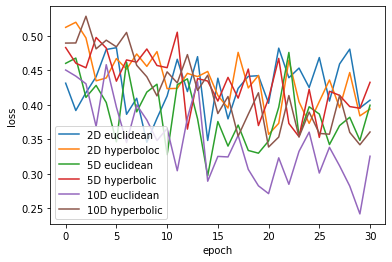

In [252]:
epoch,loss = datapoints(twod_eucl_rnn_loss,ave=True)
# plt.scatter(epoch, loss)
plt.plot(epoch, loss,label='2D euclidean')
epoch,loss = datapoints(twod_hyp_rnn_loss,ave=True)
# plt.scatter(epoch, loss)
plt.plot(epoch, loss,label='2D hyperboloc')
epoch,loss = datapoints(five_eucl_rnn_loss,ave=True)
# plt.scatter(epoch, loss)
plt.plot(epoch, loss,label='5D euclidean')
epoch,loss = datapoints(five_hyp_rnn_loss,ave=True)
# plt.scatter(epoch, loss)
plt.plot(epoch, loss,label='5D hyperbolic')
epoch, loss = datapoints(ten_eucl_rnn_loss,ave=True)
# plt.scatter(epoch, loss)
plt.plot(epoch, loss,label='10D euclidean')
epoch,loss = datapoints(ten_hyp_rnn_loss,ave=True)
# plt.scatter(epoch, loss)
plt.plot(epoch, loss,label='10D hyperbolic')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.title('Averaged loss over time')
plt.savefig('plot5.png')